In [95]:

import geopandas as gpd
from shapely import wkt


In [121]:
import pandas as pd
# from pandas.io.json import json_normalize
from SPARQLWrapper import SPARQLWrapper, JSON

def query_kadaster(sparql_query, sparql_service_url):
    sparql = SPARQLWrapper(sparql_service_url, agent="Sparql Wrapper on Jupyter example")  
    sparql.setQuery(sparql_query)
    sparql.setReturnFormat(JSON)
    result = sparql.query().convert()
    return pd.json_normalize(result["results"]["bindings"])



In [122]:
sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX brt: <http://brt.basisregistraties.overheid.nl/def/top10nl#>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
SELECT  ?geo (?x as ?geoLabel) ?naam WHERE {
 ?x a brt:Ziekenhuis;
 	brt:naam ?naam;
    geo:hasGeometry/geo:asWKT ?geo.
}
"""
sparql_service_url = "https://data.pdok.nl/sparql"

data = query_kadaster(sparql_query, sparql_service_url)

In [123]:

data = gpd.GeoDataFrame(data)
data['geometry'] = data["geo.value"]
# data = data.rename(columns = lambda col: col.replace("Label.value", ""))
data['geometry'] = data['geometry'].apply(wkt.loads)
# data.set_geometry(col='geometry', inplace=True)
data = data[["geometry", "naam.value"]]
data


,geometry,naam.value
0,"POLYGON ((6.91329 52.78570, 6.91326 52.78582, ...",Scheper Ziekenhuis
1,"POLYGON ((4.38094 51.92198, 4.38102 51.92202, ...",Franciscus Vlietland
2,"POLYGON ((4.74307 52.95810, 4.74368 52.95772, ...",Noordwest Ziekenhuisgroep
3,"POLYGON ((6.46144 52.72807, 6.46126 52.72820, ...",Bethesda
4,"POLYGON ((4.95727 52.29361, 4.95710 52.29379, ...",Academisch Medisch Centrum
...,...,...
107,"POLYGON ((5.41851 51.40712, 5.41836 51.40704, ...",Máxima Medisch Centrum
108,"POLYGON ((5.18193 52.08944, 5.18193 52.08948, ...",Universitair Medisch Centrum Utrecht Wilhelmin...
109,"POLYGON ((5.18193 52.08944, 5.18193 52.08948, ...",Universitair Medisch Centrum Utrecht Wilhelmin...
110,"POLYGON ((5.18189 52.08944, 5.18189 52.08948, ...",Universitair Medisch Centrum Utrecht Wilhelmin...


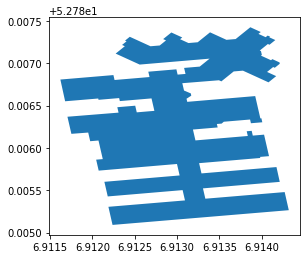

In [151]:

data[:1].plot()

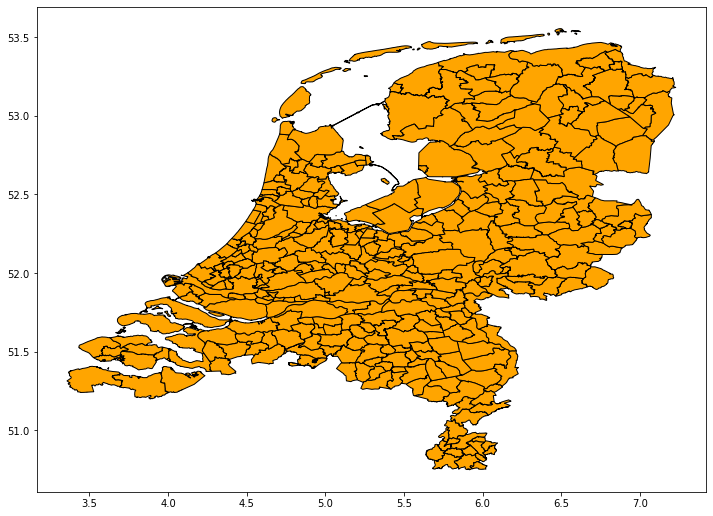

In [137]:
nl = gpd.read_file('nl2/Gemeentegrenzen_2019.shp')
base = nl.plot(color='orange', edgecolor='black',figsize=(12,12))


<Figure size 432x288 with 0 Axes>